# Аналитика успеваемости по преподавателям

Этот notebook позволяет анализировать успеваемость студентов по преподавателям и группам:
- **Средние баллы** по успеваемости по преподавателям (по группам)
- **Медианные баллы** по успеваемости по преподавателям (по группам)
- **COR** (Completion Rate) по преподавателям (по группам)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from course_analytics import CourseAnalytics
from instructor_analytics import InstructorAnalytics

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


In [2]:
# Конфигурация курса (используем те же настройки, что и в course_analytics.ipynb)
COURSE_CONFIG = {
    "excel_path": "⚫️ Разработка на Python. Профессиональный_fixed.xlsx",
}

# Путь к файлу с распределением студентов по преподавателям
INSTRUCTOR_DISTRIBUTION_PATH = "Распределение студентов по препам.xlsx"

# Конфигурация для анализа по преподавателям
INSTRUCTOR_CONFIG = {
    # "activities_filter": "all" - все активности
    # "activities_filter": "engagement" - только engagement активности (по умолчанию)
    # "activities_filter": ["Работа 1", "Работа 2"] - конкретные активности
    "activities_filter": "engagement"  # По умолчанию только engagement активности
}

# Инициализация анализаторов
analytics = CourseAnalytics(config=COURSE_CONFIG)
instructor_analytics = InstructorAnalytics(
    course_analytics=analytics,
    instructor_distribution_path=INSTRUCTOR_DISTRIBUTION_PATH,
    config=INSTRUCTOR_CONFIG
)

print("ИНИЦИАЛИЗАЦИЯ ЗАВЕРШЕНА")
print("=" * 50)
print(f"Количество студентов в ведомости: {len(analytics.students_df)}")
print(f"Количество преподавателей: {len(instructor_analytics.get_instructor_groups())}")
print(f"Фильтр активностей: {INSTRUCTOR_CONFIG.get('activities_filter', 'engagement')}")

# Показываем, какие активности используются
filtered_works = instructor_analytics._get_filtered_works()
print(f"Активностей в анализе: {len(filtered_works)}")
if len(filtered_works) > 0:
    print("Активности:")
    for work_name in sorted(filtered_works.keys()):
        work_type = filtered_works[work_name]['work_type']
        print(f"  - {work_name} ({work_type})")


ИНИЦИАЛИЗАЦИЯ ЗАВЕРШЕНА
Количество студентов в ведомости: 128
Количество преподавателей: 6
Фильтр активностей: engagement
Активностей в анализе: 5
Активности:
  - Коллоквиум 1 (colloquium)
  - 🏆 Проект. Часть 1 (project)
  - 🏆 Проект. Часть 2 (project)
  - 🏆 Проект. Часть 3 (project)
  - 🏆 Проект. Часть 4 (project)


## Проверка распределения студентов

Проверяем, как студенты распределены по преподавателям и группам.


In [ ]:
# Список преподавателей и групп
instructor_groups = instructor_analytics.get_instructor_groups()
print("ПРЕПОДАВАТЕЛИ И ГРУППЫ")
print("=" * 80)
if len(instructor_groups) > 0:
    display(instructor_groups)
    print(f"\nВсего преподавателей: {instructor_groups['Преподаватель'].nunique()}")
    print(f"Всего групп: {len(instructor_groups)}")
    print(f"Всего студентов распределено: {instructor_groups['Количество студентов'].sum()}")
else:
    print("Не найдено распределение студентов по преподавателям")

# Маппинг студентов
student_mapping = instructor_analytics.get_student_instructor_mapping()
unmapped = student_mapping[student_mapping['Преподаватель'].isna()]
if len(unmapped) > 0:
    print(f"\n⚠️ ВНИМАНИЕ: {len(unmapped)} студентов не найдены в распределении")
    print("Нераспределенные студенты:")
    print(unmapped[['Студент']].to_string(index=False))


ПРЕПОДАВАТЕЛИ И ГРУППЫ


,Преподаватель,Группа,Преподаватель-Группа,Количество студентов
53,Бражник Дмитрий,Группа 2,Бражник Дмитрий - Группа 2,1
4,Быков Кирилл,Группа 1,Быков Кирилл - Группа 1,18
5,Довгополый Иоанн,Группа 1,Довгополый Иоанн - Группа 1,30
1,Довгополый Иоанн,Группа 2,Довгополый Иоанн - Группа 2,38
14,Зиневич Максим,Группа 1,Зиневич Максим - Группа 1,15
0,Иванов Максим,Группа 1,Иванов Максим - Группа 1,20



Всего преподавателей: 5
Всего групп: 6
Всего студентов распределено: 122

⚠️ ВНИМАНИЕ: 6 студентов не найдены в распределении
Нераспределенные студенты:
                    Студент
Михайлов Алексей Алексеевич
 Контентов Студент Тестович
   Колосов Михаил Борисович
    Дробязко Егор Сергеевич
Ситдиков Дамир Владимирович
      Генкен Глеб Федорович


## МЕТРИКА 1: Средние баллы по успеваемости по преподавателям (по группам)


СРЕДНИЕ БАЛЛЫ ПО УСПЕВАЕМОСТИ ПО ПРЕПОДАВАТЕЛЯМ (ПО ГРУППАМ)


,Преподаватель,Группа,Преподаватель-Группа,Работа,Средний балл,Медиана,Количество студентов,Тип работы
0,Иванов Максим,Группа 1,Иванов Максим - Группа 1,🏆 Проект. Часть 1,8.041176,9.30,17,project
1,Довгополый Иоанн,Группа 2,Довгополый Иоанн - Группа 2,🏆 Проект. Часть 1,8.397143,9.40,35,project
2,Довгополый Иоанн,Группа 1,Довгополый Иоанн - Группа 1,🏆 Проект. Часть 1,7.900000,9.20,29,project
3,Быков Кирилл,Группа 1,Быков Кирилл - Группа 1,🏆 Проект. Часть 1,7.220000,8.00,15,project
4,Зиневич Максим,Группа 1,Зиневич Максим - Группа 1,🏆 Проект. Часть 1,8.008333,8.60,12,project
5,Бражник Дмитрий,Группа 2,Бражник Дмитрий - Группа 2,🏆 Проект. Часть 1,9.800000,9.80,1,project
6,Иванов Максим,Группа 1,Иванов Максим - Группа 1,🏆 Проект. Часть 2,7.118750,7.35,16,project
7,Довгополый Иоанн,Группа 1,Довгополый Иоанн - Группа 1,🏆 Проект. Часть 2,8.273077,8.60,26,project
8,Довгополый Иоанн,Группа 2,Довгополый Иоанн - Группа 2,🏆 Проект. Часть 2,7.934286,8.80,35,project
9,Быков Кирилл,Группа 1,Быков Кирилл - Группа 1,🏆 Проект. Часть 2,8.560000,9.00,15,project


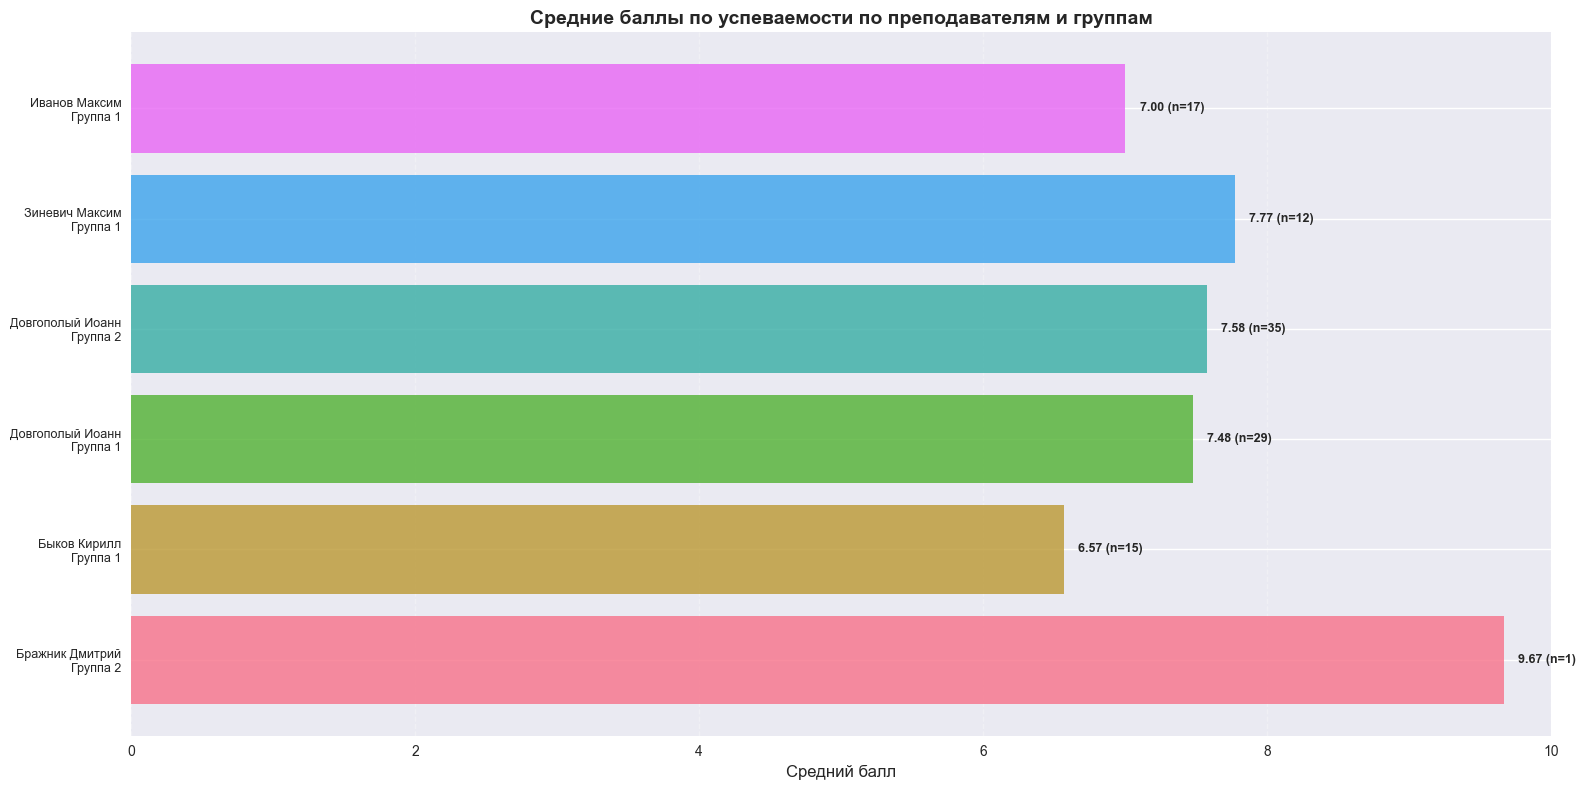

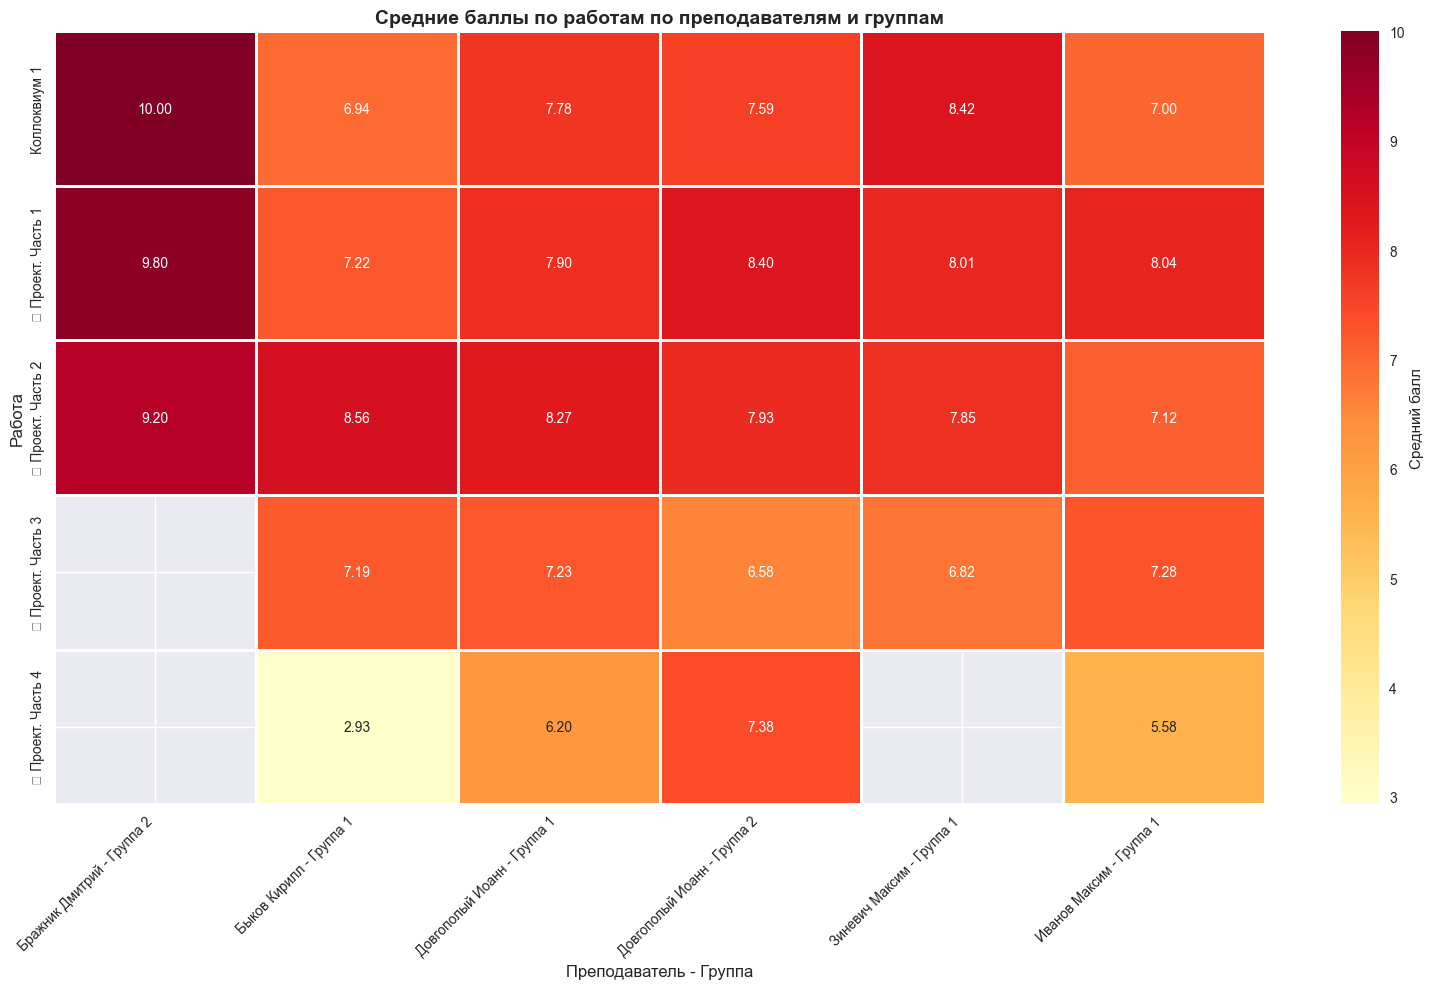

In [6]:
performance_df = instructor_analytics.get_performance_by_instructor()

if len(performance_df) > 0:
    print("СРЕДНИЕ БАЛЛЫ ПО УСПЕВАЕМОСТИ ПО ПРЕПОДАВАТЕЛЯМ (ПО ГРУППАМ)")
    print("=" * 80)
    
    # Показываем сводную таблицу
    display(performance_df.head(20))
    
    # Визуализация: средние баллы по преподавателям
    if len(performance_df) > 0:
        # Группируем по преподавателю и группе для общего среднего
        summary_by_group = performance_df.groupby(['Преподаватель', 'Группа']).agg({
            'Средний балл': 'mean',
            'Количество студентов': 'first'
        }).reset_index()
        
        fig, ax = plt.subplots(figsize=(16, max(8, len(summary_by_group) * 0.5)))
        
        # Создаем метки для групп
        labels = [f"{row['Преподаватель']}\n{row['Группа']}" 
                 for _, row in summary_by_group.iterrows()]
        
        bars = ax.barh(range(len(summary_by_group)), summary_by_group['Средний балл'], 
                      color=sns.color_palette("husl", len(summary_by_group)), alpha=0.8)
        
        ax.set_yticks(range(len(summary_by_group)))
        ax.set_yticklabels(labels, fontsize=9)
        ax.set_xlabel('Средний балл', fontsize=12)
        ax.set_title('Средние баллы по успеваемости по преподавателям и группам', 
                    fontsize=14, fontweight='bold')
        ax.set_xlim(0, 10)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        
        # Добавляем значения на график
        for i, (bar, mean, count) in enumerate(zip(bars, summary_by_group['Средний балл'], 
                                                   summary_by_group['Количество студентов'])):
            ax.text(mean + 0.1, i, f'{mean:.2f} (n={int(count)})', 
                   va='center', fontsize=9, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Визуализация по работам
        primary_works = performance_df[performance_df['Тип работы'].isin(
            analytics.primary_activity_types or []
        )]
        
        if len(primary_works) > 0:
            fig, ax = plt.subplots(figsize=(16, max(10, len(primary_works['Работа'].unique()) * 0.6)))
            
            pivot_data = primary_works.pivot_table(
                values='Средний балл',
                index='Работа',
                columns='Преподаватель-Группа',
                aggfunc='mean'
            )
            
            sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', 
                       linewidths=1, cbar_kws={'label': 'Средний балл'}, ax=ax)
            ax.set_title('Средние баллы по работам по преподавателям и группам', 
                        fontsize=14, fontweight='bold')
            ax.set_xlabel('Преподаватель - Группа', fontsize=12)
            ax.set_ylabel('Работа', fontsize=12)
            
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
else:
    print("Недостаточно данных для анализа средних баллов")


### Детальная визуализация по отдельным работам для каждого преподавателя



ПРЕПОДАВАТЕЛЬ: Иванов Максим


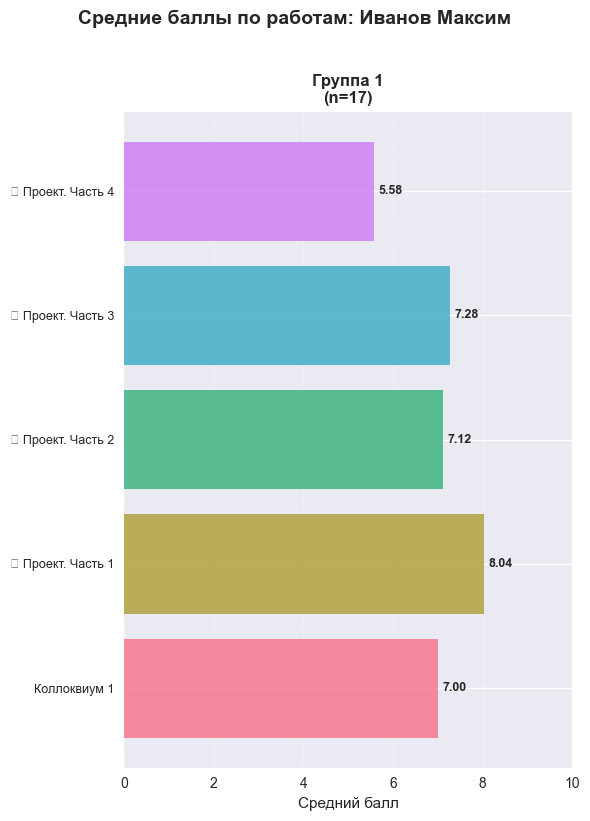


Детальные данные по Иванов Максим:


,Группа,Работа,Средний балл,Медиана,Количество студентов
0,Группа 1,🏆 Проект. Часть 1,8.041176,9.30,17
6,Группа 1,🏆 Проект. Часть 2,7.118750,7.35,16
12,Группа 1,Коллоквиум 1,7.000000,7.00,17
18,Группа 1,🏆 Проект. Часть 3,7.281250,7.95,16
23,Группа 1,🏆 Проект. Часть 4,5.575000,5.60,4



ПРЕПОДАВАТЕЛЬ: Довгополый Иоанн


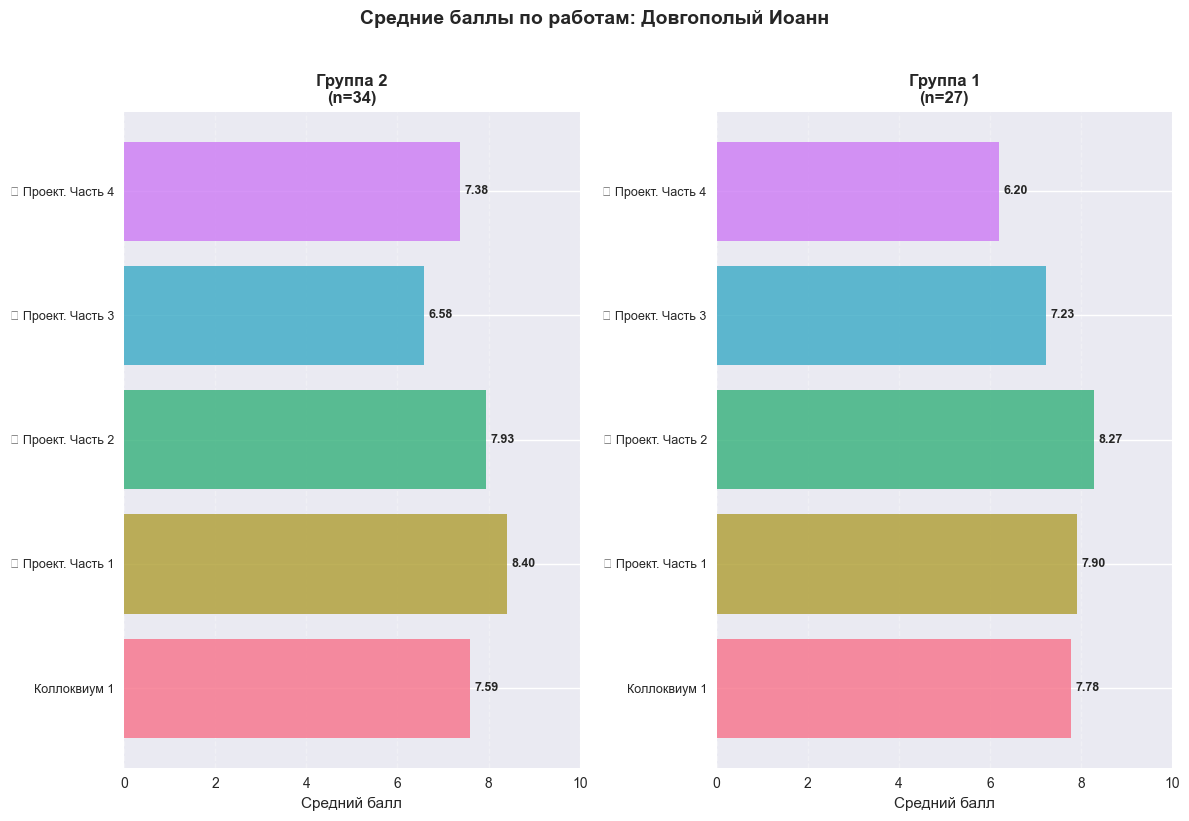


Детальные данные по Довгополый Иоанн:


,Группа,Работа,Средний балл,Медиана,Количество студентов
1,Группа 2,🏆 Проект. Часть 1,8.397143,9.4,35
2,Группа 1,🏆 Проект. Часть 1,7.900000,9.2,29
7,Группа 1,🏆 Проект. Часть 2,8.273077,8.6,26
8,Группа 2,🏆 Проект. Часть 2,7.934286,8.8,35
13,Группа 2,Коллоквиум 1,7.588235,8.0,34
15,Группа 1,Коллоквиум 1,7.777778,8.0,27
19,Группа 1,🏆 Проект. Часть 3,7.230435,7.3,23
20,Группа 2,🏆 Проект. Часть 3,6.580645,7.0,31
24,Группа 1,🏆 Проект. Часть 4,6.200000,7.7,7
25,Группа 2,🏆 Проект. Часть 4,7.380000,7.8,5



ПРЕПОДАВАТЕЛЬ: Быков Кирилл


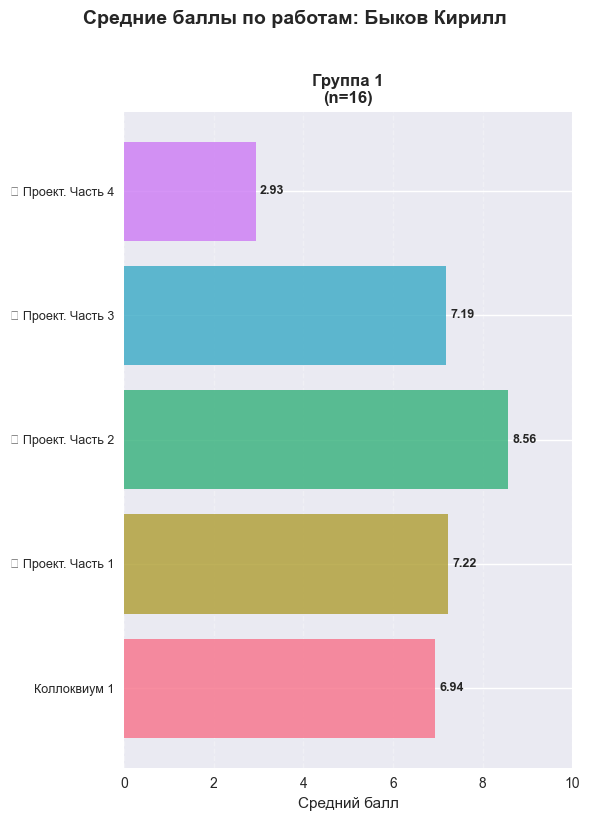


Детальные данные по Быков Кирилл:


,Группа,Работа,Средний балл,Медиана,Количество студентов
3,Группа 1,🏆 Проект. Часть 1,7.220000,8.0,15
9,Группа 1,🏆 Проект. Часть 2,8.560000,9.0,15
14,Группа 1,Коллоквиум 1,6.937500,7.5,16
21,Группа 1,🏆 Проект. Часть 3,7.186667,7.7,15
26,Группа 1,🏆 Проект. Часть 4,2.933333,2.9,3



ПРЕПОДАВАТЕЛЬ: Зиневич Максим


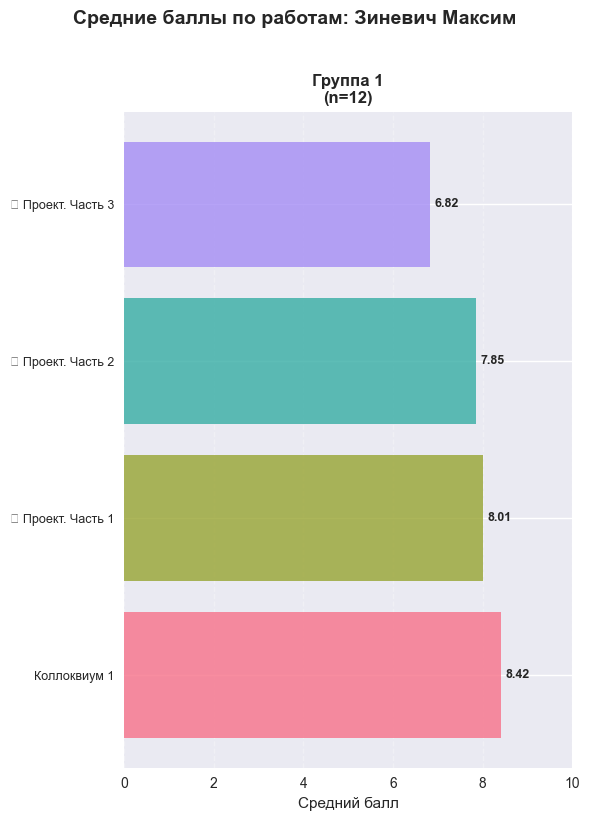


Детальные данные по Зиневич Максим:


,Группа,Работа,Средний балл,Медиана,Количество студентов
4,Группа 1,🏆 Проект. Часть 1,8.008333,8.6,12
10,Группа 1,🏆 Проект. Часть 2,7.850000,8.9,12
16,Группа 1,Коллоквиум 1,8.416667,8.0,12
22,Группа 1,🏆 Проект. Часть 3,6.818182,6.1,11



ПРЕПОДАВАТЕЛЬ: Бражник Дмитрий


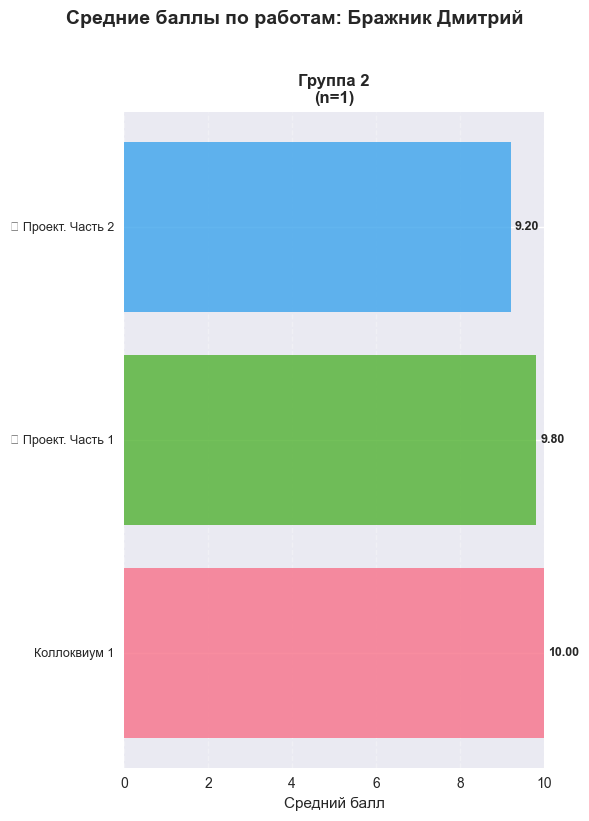


Детальные данные по Бражник Дмитрий:


,Группа,Работа,Средний балл,Медиана,Количество студентов
5,Группа 2,🏆 Проект. Часть 1,9.8,9.8,1
11,Группа 2,🏆 Проект. Часть 2,9.2,9.2,1
17,Группа 2,Коллоквиум 1,10.0,10.0,1


In [13]:
# Детальная визуализация средних баллов по работам для каждого преподавателя
performance_df = instructor_analytics.get_performance_by_instructor()

if len(performance_df) > 0:
    # Получаем список всех преподавателей
    instructors = performance_df['Преподаватель'].unique()
    
    for instructor in instructors:
        instructor_data = performance_df[performance_df['Преподаватель'] == instructor]
        
        if len(instructor_data) == 0:
            continue
        
        print(f"\n{'='*80}")
        print(f"ПРЕПОДАВАТЕЛЬ: {instructor}")
        print(f"{'='*80}")
        
        # Группируем по группам
        groups = instructor_data['Группа'].unique()
        
        fig, axes = plt.subplots(1, len(groups), figsize=(6*len(groups), 8))
        if len(groups) == 1:
            axes = [axes]
        
        for idx, group in enumerate(groups):
            group_data = instructor_data[instructor_data['Группа'] == group]
            
            # Сортируем по работе
            group_data = group_data.sort_values('Работа')
            
            ax = axes[idx]
            bars = ax.barh(range(len(group_data)), group_data['Средний балл'], 
                          color=sns.color_palette("husl", len(group_data)), alpha=0.8)
            
            ax.set_yticks(range(len(group_data)))
            # Сокращаем названия работ для читаемости
            work_labels = [work[:30] + '...' if len(work) > 30 else work 
                          for work in group_data['Работа']]
            ax.set_yticklabels(work_labels, fontsize=9)
            ax.set_xlabel('Средний балл', fontsize=11)
            ax.set_title(f'{group}\n(n={int(group_data["Количество студентов"].iloc[0])})', 
                        fontsize=12, fontweight='bold')
            ax.set_xlim(0, 10)
            ax.grid(True, alpha=0.3, axis='x', linestyle='--')
            
            # Добавляем значения
            for i, (bar, mean, count) in enumerate(zip(bars, group_data['Средний балл'], 
                                                      group_data['Количество студентов'])):
                ax.text(mean + 0.1, i, f'{mean:.2f}', 
                       va='center', fontsize=9, fontweight='bold')
        
        plt.suptitle(f'Средние баллы по работам: {instructor}', 
                    fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Таблица с детальными данными
        print(f"\nДетальные данные по {instructor}:")
        display(instructor_data[['Группа', 'Работа', 'Средний балл', 'Медиана', 
                                'Количество студентов']])


МЕДИАННЫЕ БАЛЛЫ ПО УСПЕВАЕМОСТИ ПО ПРЕПОДАВАТЕЛЯМ (ПО ГРУППАМ)


,Преподаватель,Группа,Работа,Медиана,Количество студентов,Тип работы
0,Бражник Дмитрий,Группа 2,Коллоквиум 1,10.00,1,colloquium
1,Бражник Дмитрий,Группа 2,🏆 Проект. Часть 1,9.80,1,project
2,Бражник Дмитрий,Группа 2,🏆 Проект. Часть 2,9.20,1,project
3,Быков Кирилл,Группа 1,Коллоквиум 1,7.50,16,colloquium
4,Быков Кирилл,Группа 1,⌨️ FastAPI: организация проекта и работа с HTM...,6.30,3,bonus
5,Быков Кирилл,Группа 1,⌨️ Git и GitLab,9.00,6,bonus
6,Быков Кирилл,Группа 1,⌨️ Middleware в FastAPI,8.75,2,bonus
7,Быков Кирилл,Группа 1,⌨️ MongoDB и FastAPI,3.90,3,bonus
8,Быков Кирилл,Группа 1,⌨️ Асинхронное программирование в Python,5.35,2,bonus
9,Быков Кирилл,Группа 1,⌨️ Взаимодействие с внешними API через httpx,4.95,6,bonus


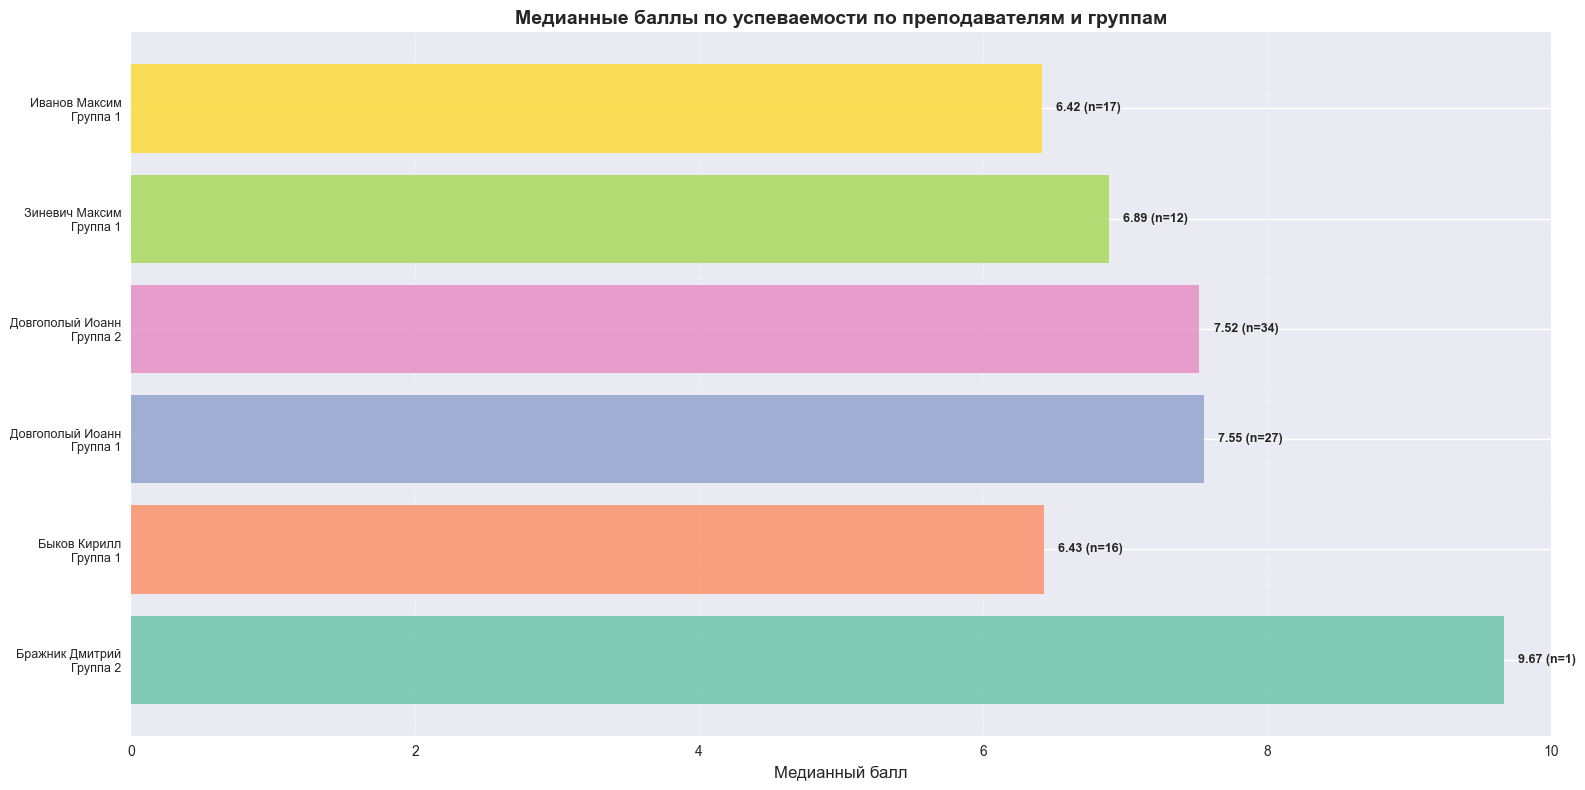

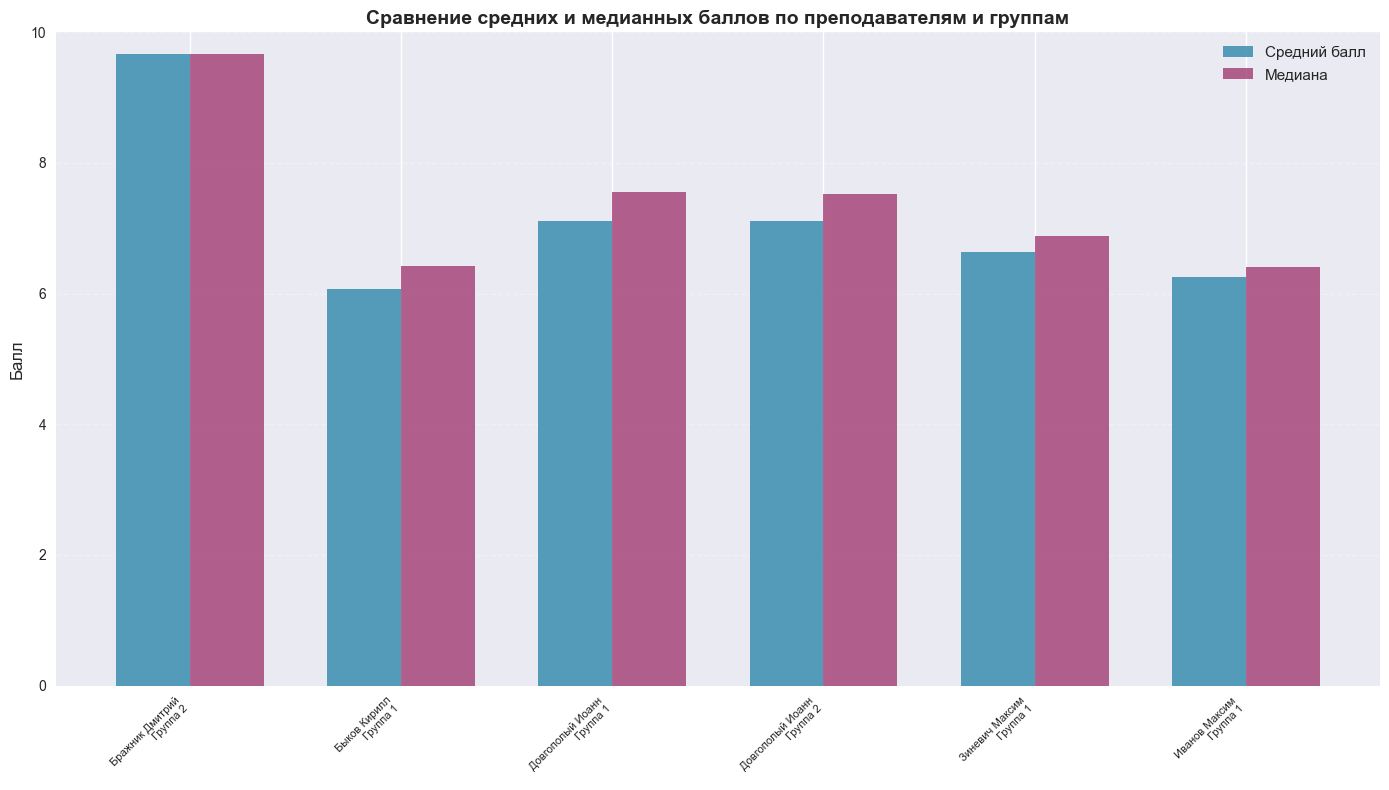

In [6]:
median_df = instructor_analytics.get_median_performance_by_instructor()

if len(median_df) > 0:
    print("МЕДИАННЫЕ БАЛЛЫ ПО УСПЕВАЕМОСТИ ПО ПРЕПОДАВАТЕЛЯМ (ПО ГРУППАМ)")
    print("=" * 80)
    
    display(median_df.head(20))
    
    # Визуализация: медианные баллы по преподавателям
    summary_by_group = median_df.groupby(['Преподаватель', 'Группа']).agg({
        'Медиана': 'mean',
        'Количество студентов': 'first'
    }).reset_index()
    
    fig, ax = plt.subplots(figsize=(16, max(8, len(summary_by_group) * 0.5)))
    
    labels = [f"{row['Преподаватель']}\n{row['Группа']}" 
             for _, row in summary_by_group.iterrows()]
    
    bars = ax.barh(range(len(summary_by_group)), summary_by_group['Медиана'], 
                  color=sns.color_palette("Set2", len(summary_by_group)), alpha=0.8)
    
    ax.set_yticks(range(len(summary_by_group)))
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_xlabel('Медианный балл', fontsize=12)
    ax.set_title('Медианные баллы по успеваемости по преподавателям и группам', 
                fontsize=14, fontweight='bold')
    ax.set_xlim(0, 10)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    for i, (bar, median, count) in enumerate(zip(bars, summary_by_group['Медиана'], 
                                                 summary_by_group['Количество студентов'])):
        ax.text(median + 0.1, i, f'{median:.2f} (n={int(count)})', 
               va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Сравнение среднего и медианы
    performance_df = instructor_analytics.get_performance_by_instructor()
    if len(performance_df) > 0:
        comparison = performance_df.groupby(['Преподаватель', 'Группа']).agg({
            'Средний балл': 'mean',
            'Медиана': 'mean'
        }).reset_index()
        
        fig, ax = plt.subplots(figsize=(14, 8))
        x = np.arange(len(comparison))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, comparison['Средний балл'], width, 
                      label='Средний балл', color='#2E86AB', alpha=0.8)
        bars2 = ax.bar(x + width/2, comparison['Медиана'], width, 
                      label='Медиана', color='#A23B72', alpha=0.8)
        
        labels = [f"{row['Преподаватель']}\n{row['Группа']}" 
                 for _, row in comparison.iterrows()]
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize=8, rotation=45, ha='right')
        ax.set_ylabel('Балл', fontsize=12)
        ax.set_title('Сравнение средних и медианных баллов по преподавателям и группам', 
                    fontsize=14, fontweight='bold')
        ax.set_ylim(0, 10)
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        plt.tight_layout()
        plt.show()
else:
    print("Недостаточно данных для анализа медианных баллов")


### Детальная визуализация медианных баллов по отдельным работам



ПРЕПОДАВАТЕЛЬ: Бражник Дмитрий (Медианные баллы)


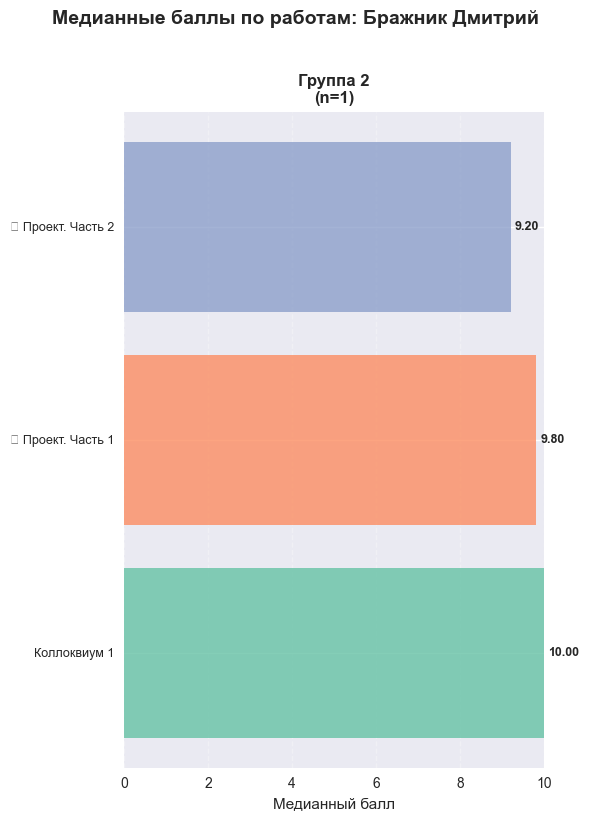


ПРЕПОДАВАТЕЛЬ: Быков Кирилл (Медианные баллы)


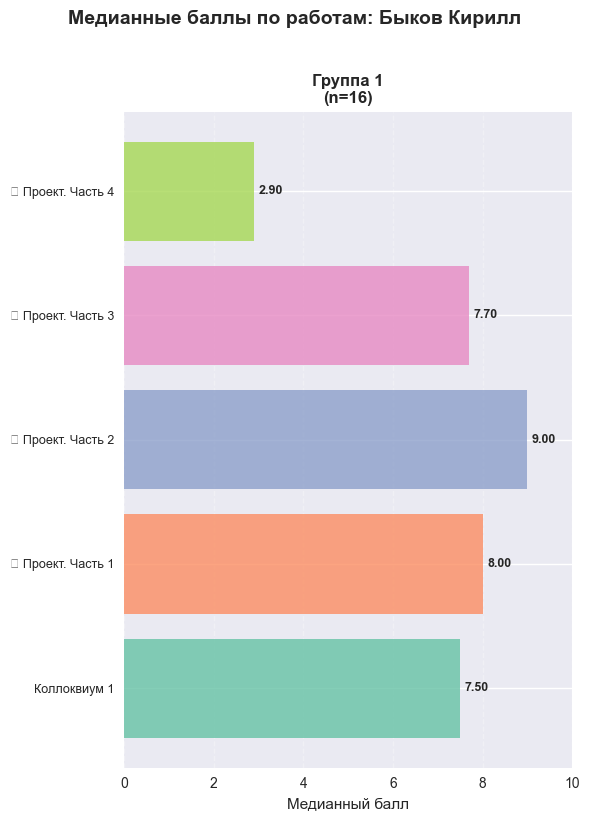


ПРЕПОДАВАТЕЛЬ: Довгополый Иоанн (Медианные баллы)


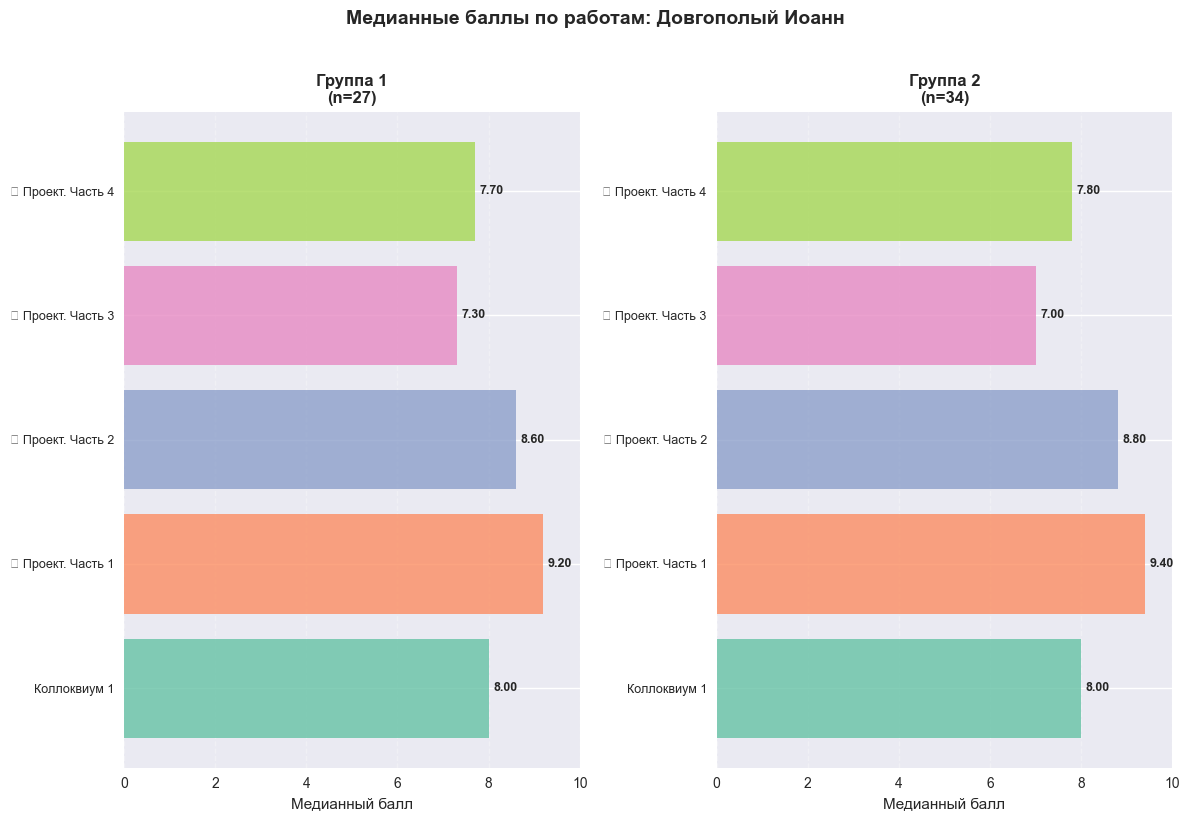


ПРЕПОДАВАТЕЛЬ: Зиневич Максим (Медианные баллы)


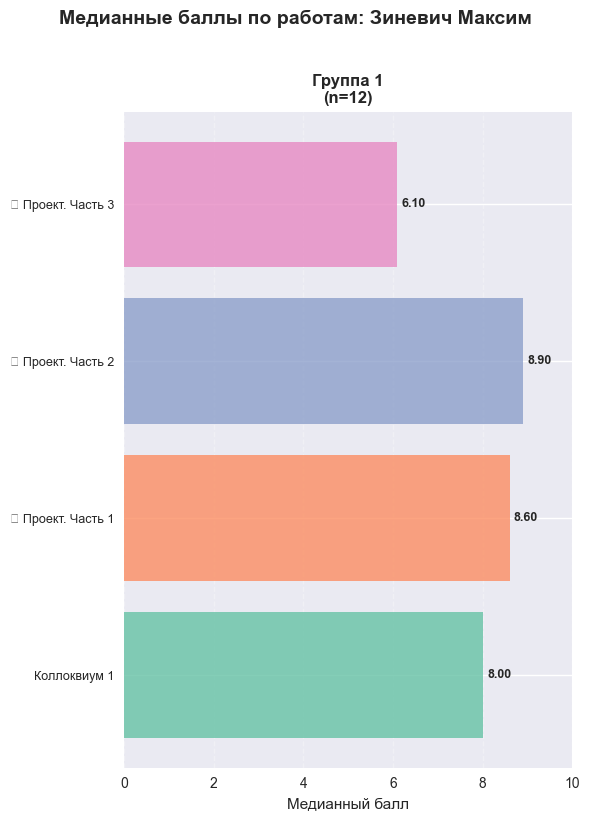


ПРЕПОДАВАТЕЛЬ: Иванов Максим (Медианные баллы)


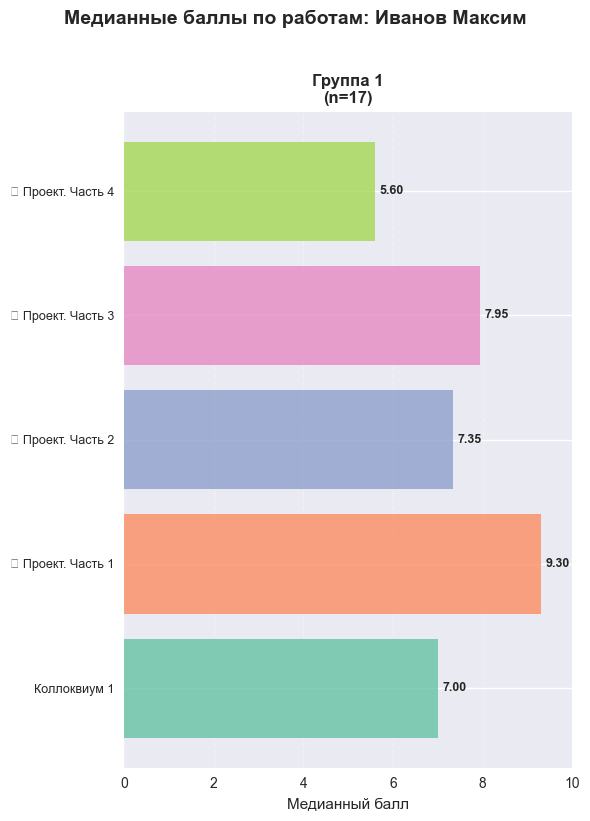

In [8]:
# Детальная визуализация медианных баллов по работам для каждого преподавателя
median_df = instructor_analytics.get_median_performance_by_instructor()

if len(median_df) > 0:
    instructors = median_df['Преподаватель'].unique()
    
    for instructor in instructors:
        instructor_data = median_df[median_df['Преподаватель'] == instructor]
        
        if len(instructor_data) == 0:
            continue
        
        print(f"\n{'='*80}")
        print(f"ПРЕПОДАВАТЕЛЬ: {instructor} (Медианные баллы)")
        print(f"{'='*80}")
        
        groups = instructor_data['Группа'].unique()
        
        fig, axes = plt.subplots(1, len(groups), figsize=(6*len(groups), 8))
        if len(groups) == 1:
            axes = [axes]
        
        for idx, group in enumerate(groups):
            group_data = instructor_data[instructor_data['Группа'] == group]
            group_data = group_data.sort_values('Работа')
            
            ax = axes[idx]
            bars = ax.barh(range(len(group_data)), group_data['Медиана'], 
                          color=sns.color_palette("Set2", len(group_data)), alpha=0.8)
            
            ax.set_yticks(range(len(group_data)))
            work_labels = [work[:30] + '...' if len(work) > 30 else work 
                          for work in group_data['Работа']]
            ax.set_yticklabels(work_labels, fontsize=9)
            ax.set_xlabel('Медианный балл', fontsize=11)
            ax.set_title(f'{group}\n(n={int(group_data["Количество студентов"].iloc[0])})', 
                        fontsize=12, fontweight='bold')
            ax.set_xlim(0, 10)
            ax.grid(True, alpha=0.3, axis='x', linestyle='--')
            
            for i, (bar, median) in enumerate(zip(bars, group_data['Медиана'])):
                ax.text(median + 0.1, i, f'{median:.2f}', 
                       va='center', fontsize=9, fontweight='bold')
        
        plt.suptitle(f'Медианные баллы по работам: {instructor}', 
                    fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()


COR (COMPLETION RATE) ПО ПРЕПОДАВАТЕЛЯМ (ПО ГРУППАМ)
COR = процент студентов, выполнивших работу


,Преподаватель,Группа,Преподаватель-Группа,Работа,COR,Выполнили,Всего,Тип работы
0,Иванов Максим,Группа 1,Иванов Максим - Группа 1,🏆 Проект. Часть 1,85.000000,17,20,project
1,Довгополый Иоанн,Группа 2,Довгополый Иоанн - Группа 2,🏆 Проект. Часть 1,92.105263,35,38,project
2,Быков Кирилл,Группа 1,Быков Кирилл - Группа 1,🏆 Проект. Часть 1,83.333333,15,18,project
3,Довгополый Иоанн,Группа 1,Довгополый Иоанн - Группа 1,🏆 Проект. Часть 1,96.666667,29,30,project
4,Зиневич Максим,Группа 1,Зиневич Максим - Группа 1,🏆 Проект. Часть 1,80.000000,12,15,project
5,Бражник Дмитрий,Группа 2,Бражник Дмитрий - Группа 2,🏆 Проект. Часть 1,100.000000,1,1,project
6,Иванов Максим,Группа 1,Иванов Максим - Группа 1,🏆 Проект. Часть 2,80.000000,16,20,project
7,Довгополый Иоанн,Группа 2,Довгополый Иоанн - Группа 2,🏆 Проект. Часть 2,92.105263,35,38,project
8,Быков Кирилл,Группа 1,Быков Кирилл - Группа 1,🏆 Проект. Часть 2,83.333333,15,18,project
9,Довгополый Иоанн,Группа 1,Довгополый Иоанн - Группа 1,🏆 Проект. Часть 2,86.666667,26,30,project


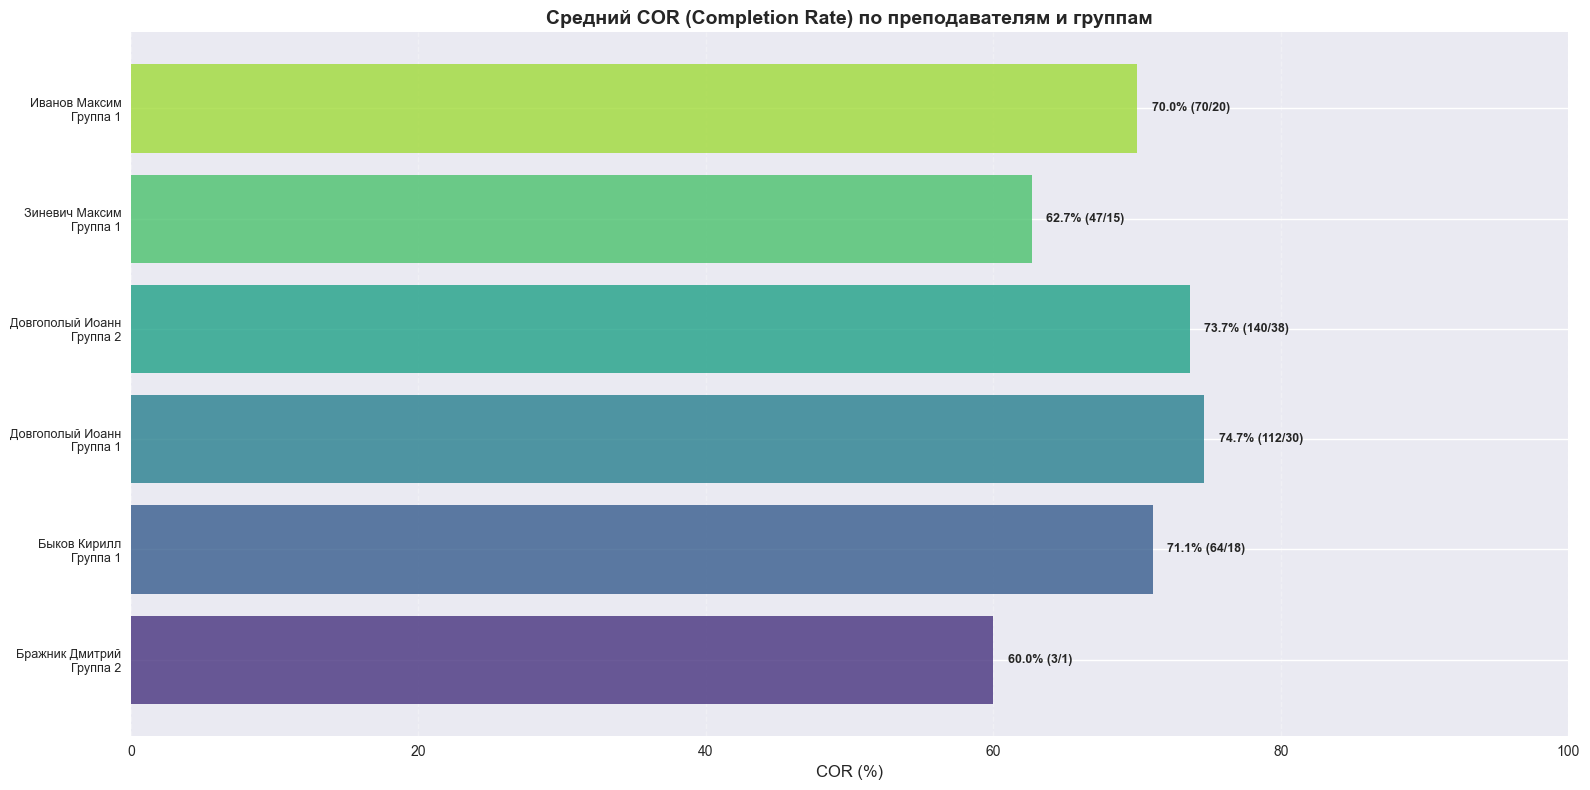

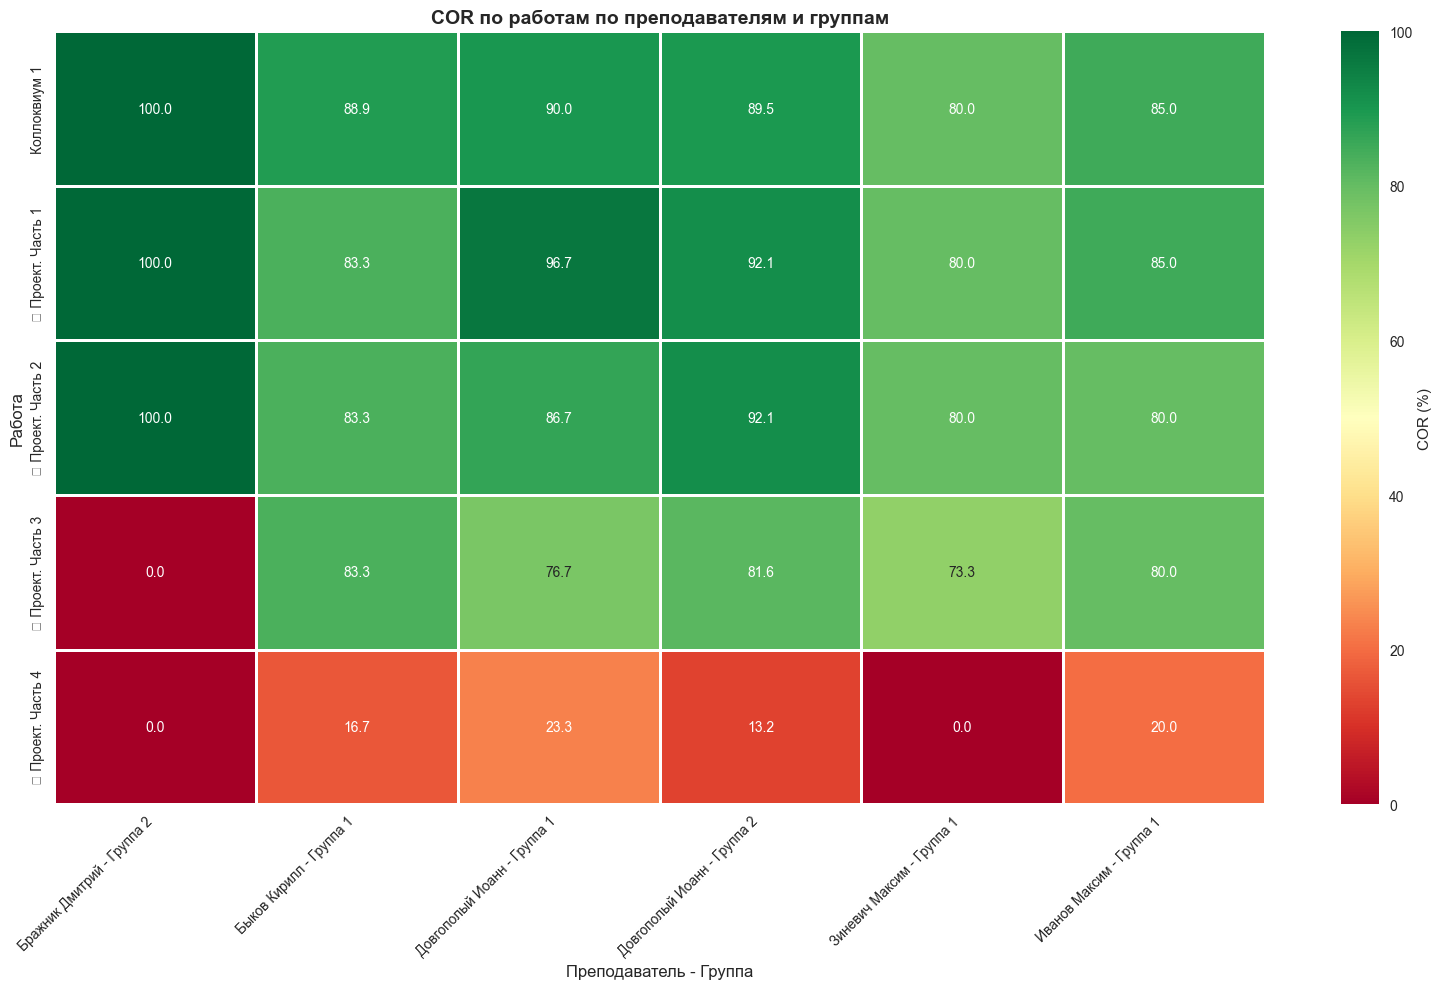

In [9]:
cor_df = instructor_analytics.get_cor_by_instructor()

if len(cor_df) > 0:
    print("COR (COMPLETION RATE) ПО ПРЕПОДАВАТЕЛЯМ (ПО ГРУППАМ)")
    print("=" * 80)
    print("COR = процент студентов, выполнивших работу")
    
    display(cor_df.head(20))
    
    # Визуализация: средний COR по преподавателям и группам
    summary_cor = cor_df.groupby(['Преподаватель', 'Группа']).agg({
        'COR': 'mean',
        'Выполнили': 'sum',
        'Всего': 'first'
    }).reset_index()
    
    fig, ax = plt.subplots(figsize=(16, max(8, len(summary_cor) * 0.5)))
    
    labels = [f"{row['Преподаватель']}\n{row['Группа']}" 
             for _, row in summary_cor.iterrows()]
    
    bars = ax.barh(range(len(summary_cor)), summary_cor['COR'], 
                  color=sns.color_palette("viridis", len(summary_cor)), alpha=0.8)
    
    ax.set_yticks(range(len(summary_cor)))
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_xlabel('COR (%)', fontsize=12)
    ax.set_title('Средний COR (Completion Rate) по преподавателям и группам', 
                fontsize=14, fontweight='bold')
    ax.set_xlim(0, 100)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    for i, (bar, cor, completed, total) in enumerate(zip(bars, summary_cor['COR'], 
                                                          summary_cor['Выполнили'], 
                                                          summary_cor['Всего'])):
        ax.text(cor + 1, i, f'{cor:.1f}% ({int(completed)}/{int(total)})', 
               va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Визуализация COR по работам
    primary_works_cor = cor_df[cor_df['Тип работы'].isin(
        analytics.primary_activity_types or []
    )]
    
    if len(primary_works_cor) > 0:
        fig, ax = plt.subplots(figsize=(16, max(10, len(primary_works_cor['Работа'].unique()) * 0.6)))
        
        pivot_data = primary_works_cor.pivot_table(
            values='COR',
            index='Работа',
            columns='Преподаватель-Группа',
            aggfunc='mean'
        )
        
        sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='RdYlGn', 
                   linewidths=1, cbar_kws={'label': 'COR (%)'}, 
                   vmin=0, vmax=100, ax=ax)
        ax.set_title('COR по работам по преподавателям и группам', 
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('Преподаватель - Группа', fontsize=12)
        ax.set_ylabel('Работа', fontsize=12)
        
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
else:
    print("Недостаточно данных для анализа COR")


### Детальная визуализация COR по отдельным работам



ПРЕПОДАВАТЕЛЬ: Иванов Максим (COR)


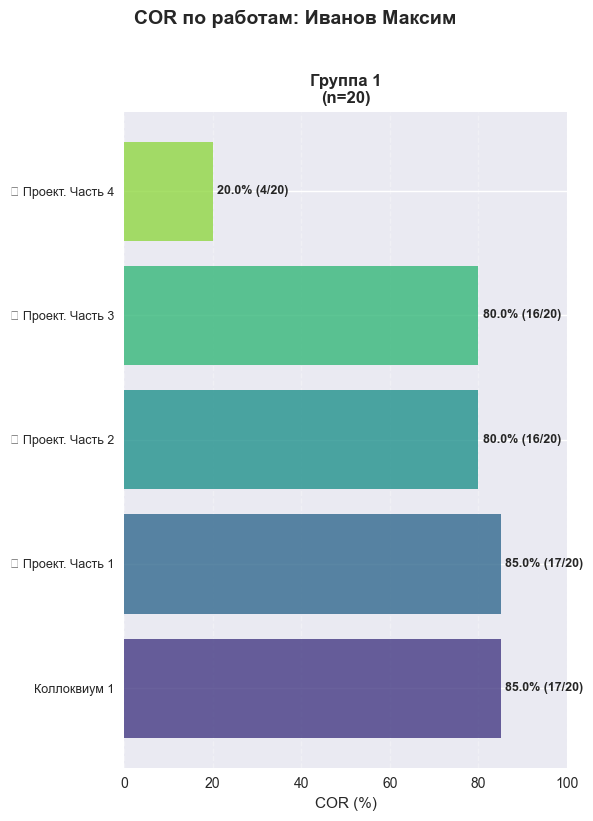


Детальные данные по COR для Иванов Максим:


'  Группа            Работа  COR  Выполнили  Всего\nГруппа 1 🏆 Проект. Часть 1 85.0         17     20\nГруппа 1 🏆 Проект. Часть 2 80.0         16     20\nГруппа 1      Коллоквиум 1 85.0         17     20\nГруппа 1 🏆 Проект. Часть 3 80.0         16     20\nГруппа 1 🏆 Проект. Часть 4 20.0          4     20'


ПРЕПОДАВАТЕЛЬ: Довгополый Иоанн (COR)


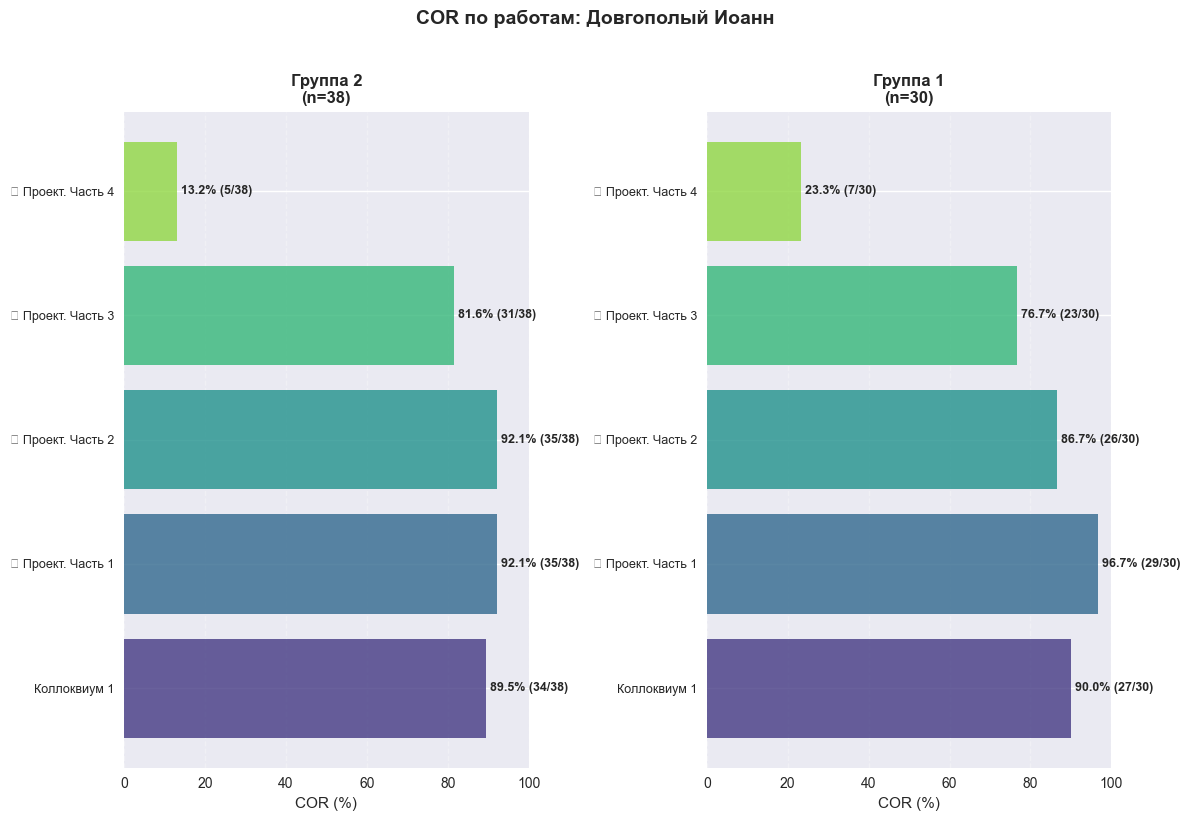


Детальные данные по COR для Довгополый Иоанн:


'  Группа            Работа       COR  Выполнили  Всего\nГруппа 2 🏆 Проект. Часть 1 92.105263         35     38\nГруппа 1 🏆 Проект. Часть 1 96.666667         29     30\nГруппа 2 🏆 Проект. Часть 2 92.105263         35     38\nГруппа 1 🏆 Проект. Часть 2 86.666667         26     30\nГруппа 2      Коллоквиум 1 89.473684         34     38\nГруппа 1      Коллоквиум 1 90.000000         27     30\nГруппа 2 🏆 Проект. Часть 3 81.578947         31     38\nГруппа 1 🏆 Проект. Часть 3 76.666667         23     30\nГруппа 2 🏆 Проект. Часть 4 13.157895          5     38\nГруппа 1 🏆 Проект. Часть 4 23.333333          7     30'


ПРЕПОДАВАТЕЛЬ: Быков Кирилл (COR)


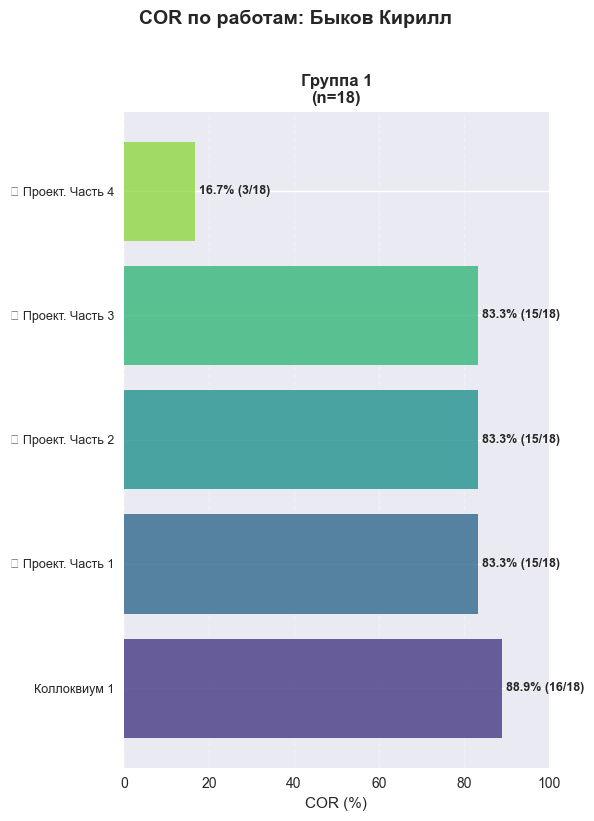


Детальные данные по COR для Быков Кирилл:


'  Группа            Работа       COR  Выполнили  Всего\nГруппа 1 🏆 Проект. Часть 1 83.333333         15     18\nГруппа 1 🏆 Проект. Часть 2 83.333333         15     18\nГруппа 1      Коллоквиум 1 88.888889         16     18\nГруппа 1 🏆 Проект. Часть 3 83.333333         15     18\nГруппа 1 🏆 Проект. Часть 4 16.666667          3     18'


ПРЕПОДАВАТЕЛЬ: Зиневич Максим (COR)


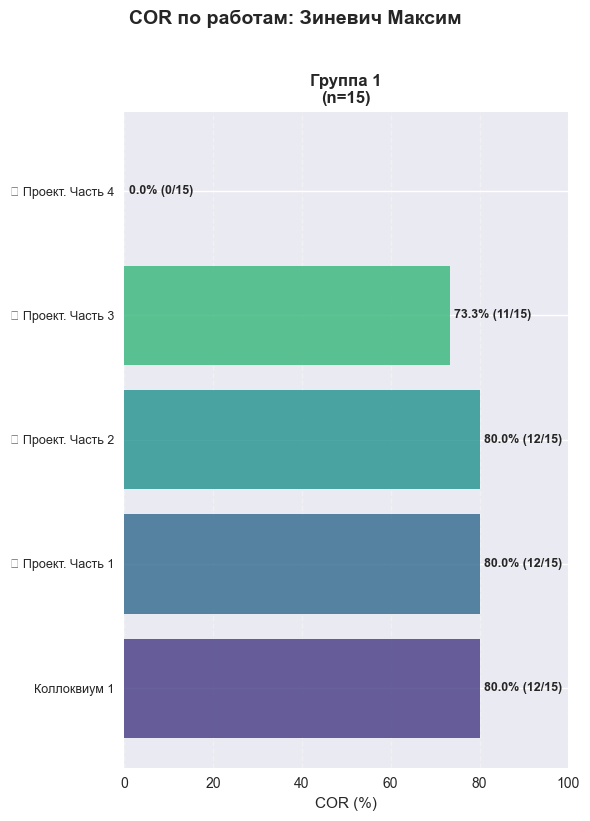


Детальные данные по COR для Зиневич Максим:


'  Группа            Работа       COR  Выполнили  Всего\nГруппа 1 🏆 Проект. Часть 1 80.000000         12     15\nГруппа 1 🏆 Проект. Часть 2 80.000000         12     15\nГруппа 1      Коллоквиум 1 80.000000         12     15\nГруппа 1 🏆 Проект. Часть 3 73.333333         11     15\nГруппа 1 🏆 Проект. Часть 4  0.000000          0     15'


ПРЕПОДАВАТЕЛЬ: Бражник Дмитрий (COR)


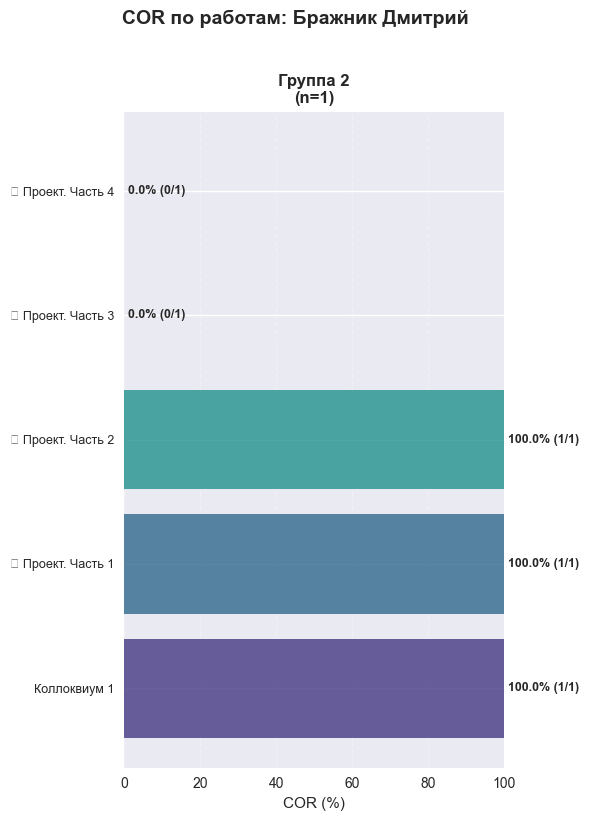


Детальные данные по COR для Бражник Дмитрий:


'  Группа            Работа   COR  Выполнили  Всего\nГруппа 2 🏆 Проект. Часть 1 100.0          1      1\nГруппа 2 🏆 Проект. Часть 2 100.0          1      1\nГруппа 2      Коллоквиум 1 100.0          1      1\nГруппа 2 🏆 Проект. Часть 3   0.0          0      1\nГруппа 2 🏆 Проект. Часть 4   0.0          0      1'

In [ ]:
# Детальная визуализация COR по работам для каждого преподавателя
cor_df = instructor_analytics.get_cor_by_instructor()

if len(cor_df) > 0:
    instructors = cor_df['Преподаватель'].unique()
    
    for instructor in instructors:
        instructor_data = cor_df[cor_df['Преподаватель'] == instructor]
        
        if len(instructor_data) == 0:
            continue
        
        print(f"\n{'='*80}")
        print(f"ПРЕПОДАВАТЕЛЬ: {instructor} (COR)")
        print(f"{'='*80}")
        
        groups = instructor_data['Группа'].unique()
        
        fig, axes = plt.subplots(1, len(groups), figsize=(6*len(groups), 8))
        if len(groups) == 1:
            axes = [axes]
        
        for idx, group in enumerate(groups):
            group_data = instructor_data[instructor_data['Группа'] == group]
            group_data = group_data.sort_values('Работа')
            
            ax = axes[idx]
            bars = ax.barh(range(len(group_data)), group_data['COR'], 
                          color=sns.color_palette("viridis", len(group_data)), alpha=0.8)
            
            ax.set_yticks(range(len(group_data)))
            work_labels = [work[:30] + '...' if len(work) > 30 else work 
                          for work in group_data['Работа']]
            ax.set_yticklabels(work_labels, fontsize=9)
            ax.set_xlabel('COR (%)', fontsize=11)
            ax.set_title(f'{group}\n(n={int(group_data["Всего"].iloc[0])})', 
                        fontsize=12, fontweight='bold')
            ax.set_xlim(0, 100)
            ax.grid(True, alpha=0.3, axis='x', linestyle='--')
            
            for i, (bar, cor, completed, total) in enumerate(zip(bars, group_data['COR'], 
                                                                 group_data['Выполнили'], 
                                                                 group_data['Всего'])):
                ax.text(cor + 1, i, f'{cor:.1f}% ({int(completed)}/{int(total)})', 
                       va='center', fontsize=9, fontweight='bold')
        
        plt.suptitle(f'COR по работам: {instructor}', 
                    fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Таблица с детальными данными
        print(f"\nДетальные данные по COR для {instructor}:")
        display(instructor_data[['Группа', 'Работа', 'COR', 'Выполнили', 'Всего']])


## Сводная статистика по преподавателям


СВОДНАЯ СТАТИСТИКА ПО ПРЕПОДАВАТЕЛЯМ И ГРУППАМ


,Преподаватель,Группа,Преподаватель-Группа,Средний балл (среднее),Средний балл (медиана),Медиана баллов,Количество студентов,Средний COR
0,Бражник Дмитрий,Группа 2,Бражник Дмитрий - Группа 2,9.666667,9.800000,9.666667,1,60.000000
1,Быков Кирилл,Группа 1,Быков Кирилл - Группа 1,6.567500,7.186667,7.020000,15,71.111111
2,Довгополый Иоанн,Группа 1,Довгополый Иоанн - Группа 1,7.476258,7.777778,8.160000,29,74.666667
3,Довгополый Иоанн,Группа 2,Довгополый Иоанн - Группа 2,7.576062,7.588235,8.200000,35,73.684211
4,Зиневич Максим,Группа 1,Зиневич Максим - Группа 1,7.773295,7.929167,7.900000,12,62.666667
5,Иванов Максим,Группа 1,Иванов Максим - Группа 1,7.003235,7.118750,7.440000,17,70.000000


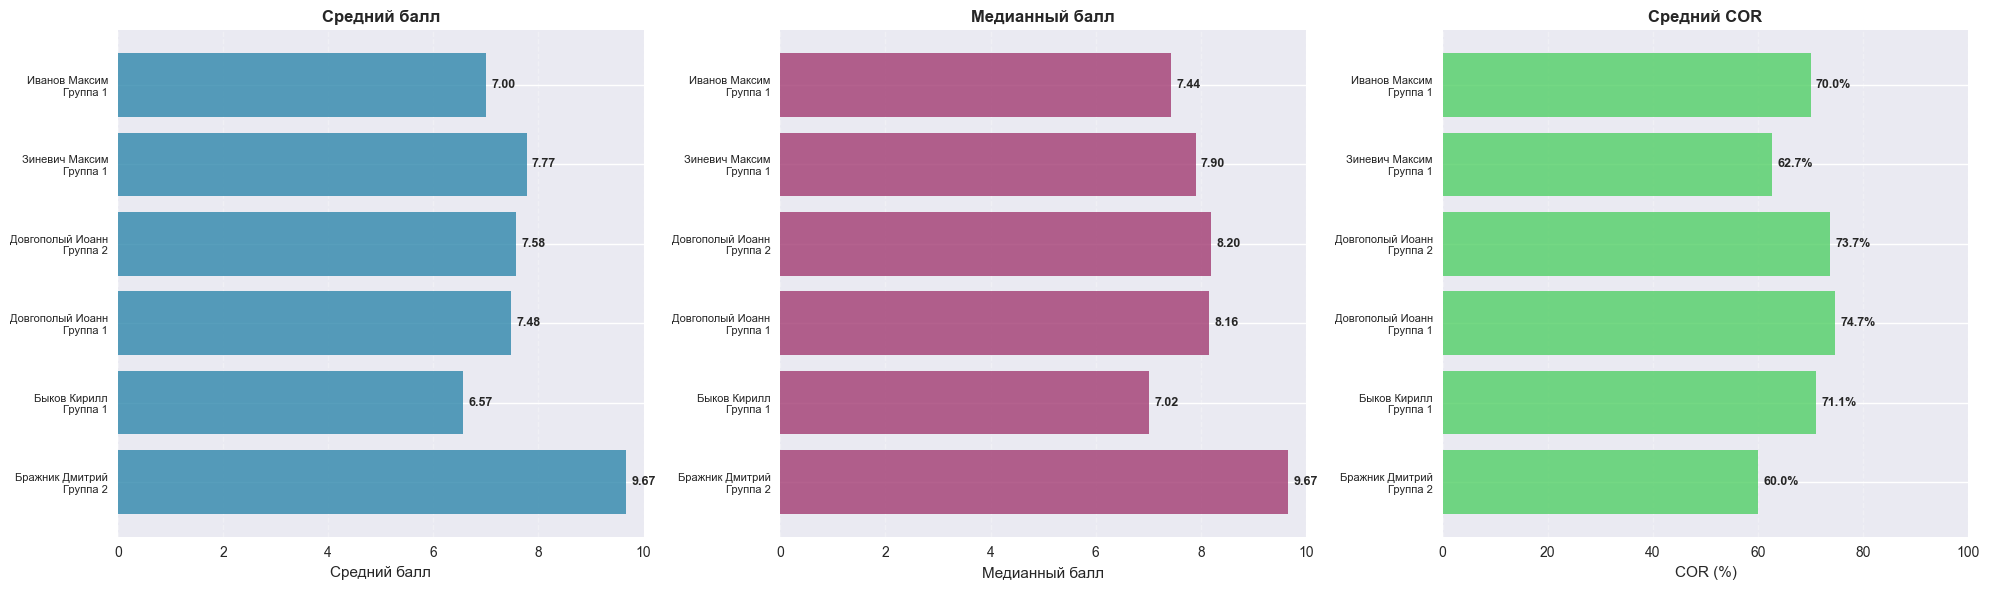

In [12]:
summary_df = instructor_analytics.get_summary_by_instructor()

if len(summary_df) > 0:
    print("СВОДНАЯ СТАТИСТИКА ПО ПРЕПОДАВАТЕЛЯМ И ГРУППАМ")
    print("=" * 80)
    display(summary_df)
    
    # Визуализация сводной статистики
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # График 1: Средний балл
    ax1 = axes[0]
    labels = [f"{row['Преподаватель']}\n{row['Группа']}" 
             for _, row in summary_df.iterrows()]
    bars1 = ax1.barh(range(len(summary_df)), summary_df['Средний балл (среднее)'], 
                    color='#2E86AB', alpha=0.8)
    ax1.set_yticks(range(len(summary_df)))
    ax1.set_yticklabels(labels, fontsize=8)
    ax1.set_xlabel('Средний балл', fontsize=11)
    ax1.set_title('Средний балл', fontsize=12, fontweight='bold')
    ax1.set_xlim(0, 10)
    ax1.grid(True, alpha=0.3, axis='x', linestyle='--')
    for i, (bar, val) in enumerate(zip(bars1, summary_df['Средний балл (среднее)'])):
        ax1.text(val + 0.1, i, f'{val:.2f}', va='center', fontsize=9, fontweight='bold')
    
    # График 2: Медиана
    ax2 = axes[1]
    bars2 = ax2.barh(range(len(summary_df)), summary_df['Медиана баллов'], 
                    color='#A23B72', alpha=0.8)
    ax2.set_yticks(range(len(summary_df)))
    ax2.set_yticklabels(labels, fontsize=8)
    ax2.set_xlabel('Медианный балл', fontsize=11)
    ax2.set_title('Медианный балл', fontsize=12, fontweight='bold')
    ax2.set_xlim(0, 10)
    ax2.grid(True, alpha=0.3, axis='x', linestyle='--')
    for i, (bar, val) in enumerate(zip(bars2, summary_df['Медиана баллов'])):
        ax2.text(val + 0.1, i, f'{val:.2f}', va='center', fontsize=9, fontweight='bold')
    
    # График 3: COR
    ax3 = axes[2]
    bars3 = ax3.barh(range(len(summary_df)), summary_df['Средний COR'], 
                    color='#51CF66', alpha=0.8)
    ax3.set_yticks(range(len(summary_df)))
    ax3.set_yticklabels(labels, fontsize=8)
    ax3.set_xlabel('COR (%)', fontsize=11)
    ax3.set_title('Средний COR', fontsize=12, fontweight='bold')
    ax3.set_xlim(0, 100)
    ax3.grid(True, alpha=0.3, axis='x', linestyle='--')
    for i, (bar, val) in enumerate(zip(bars3, summary_df['Средний COR'])):
        if not pd.isna(val):
            ax3.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно данных для сводной статистики")


## Экспорт результатов


In [ ]:
all_metrics = instructor_analytics.get_all_metrics()

export_to_excel = False  # Установите True, если хотите экспортировать

if export_to_excel:
    output_file = 'instructor_analytics_report.xlsx'
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        all_metrics['instructor_groups'].to_excel(writer, sheet_name='Преподаватели и группы', index=False)
        all_metrics['student_mapping'].to_excel(writer, sheet_name='Распределение студентов', index=False)
        all_metrics['performance'].to_excel(writer, sheet_name='Средние баллы', index=False)
        all_metrics['median_performance'].to_excel(writer, sheet_name='Медианные баллы', index=False)
        all_metrics['cor'].to_excel(writer, sheet_name='COR', index=False)
        all_metrics['summary'].to_excel(writer, sheet_name='Сводная статистика', index=False)
    
    print(f"Все метрики экспортированы в {output_file}")
else:
    print("Для экспорта результатов установите export_to_excel = True")
